# Loading geodata tiff file

Here we will inspect visually the geodata that is downloaded by the `bioscann` pipeline via api request, and visualize the different data channels.

Load the required packages:

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tifffile import imsave, imread
import json, os, math

Define the target folder:

In [7]:
target_folder = 'data/processed_geodata/alpine/alpine_geodata'

Load the names of the downloaded data channels from the metadata json file:

In [25]:
with open(os.path.join(target_folder,'channel_info.json'), 'r') as file:
    data = json.load(file)
keys = list(data.keys())
print(keys)


['treeheight', 'soil_moisture', 'elevation_gradient', 'max_temp', 'sum_temp', 'ditches', 'peat_depth', 'soil_type', 'biomass', 'leaves_present', 'satellite']


Load the tiff file containing the geodata for one of the training instances:

In [26]:
geodata_file = os.path.join(target_folder,'indata/bboxes_0_0.tiff')
image = imread(geodata_file)
image.shape

(128, 128, 11)

Display the content of the geodata tiff-file:

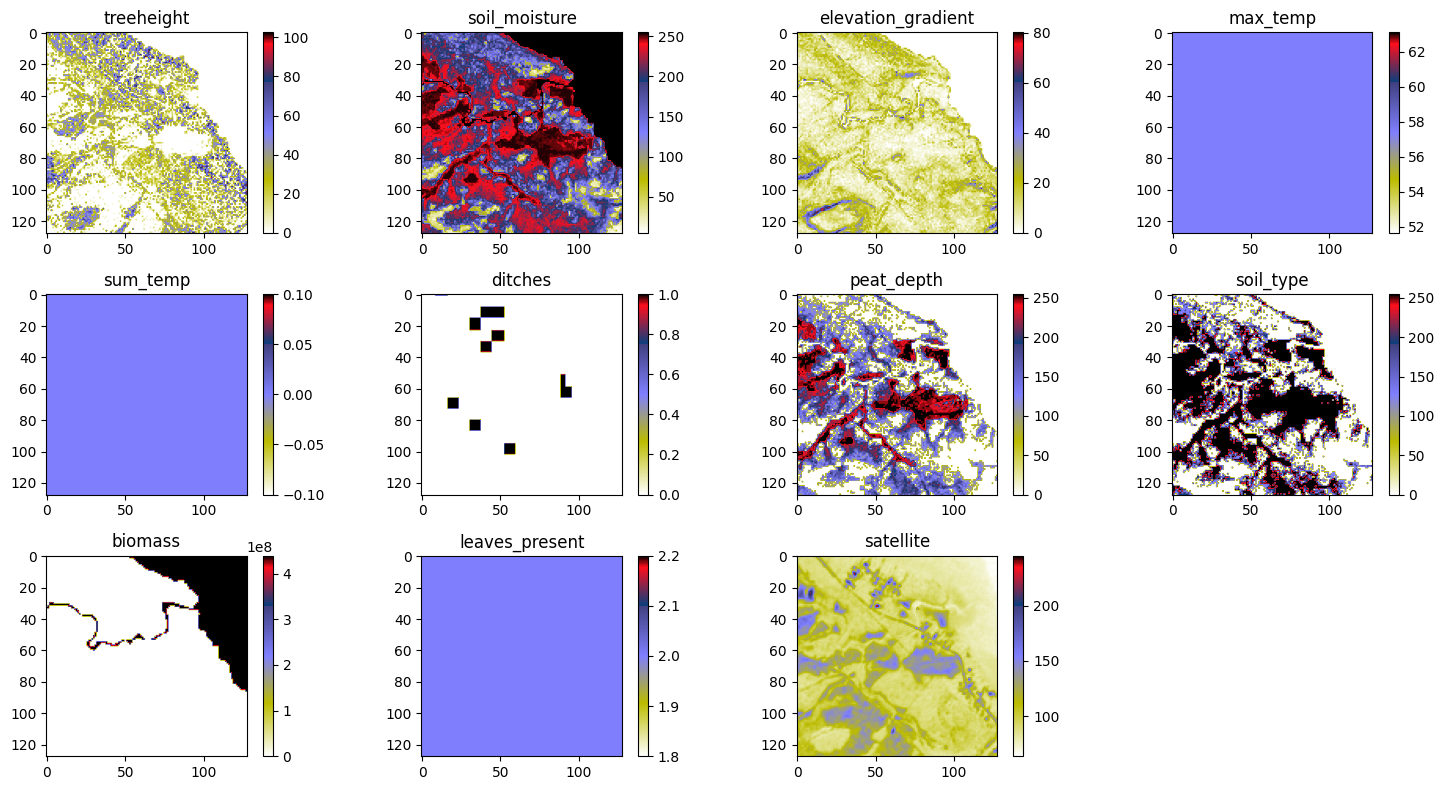

In [27]:
# Calculating the number of rows and columns for the subplots
n_channels = len(keys)
n_cols = int(math.ceil(math.sqrt(n_channels)))
n_rows = int(math.ceil(n_channels / n_cols))

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

# Flatten axes array if necessary
axes = axes.ravel() if n_channels > 1 else [axes]

# Loop through each channel
for i in range(n_channels):
    ax = axes[i]
    im = ax.imshow(image[..., i], cmap='gist_stern_r')  # Change colormap as needed
    fig.colorbar(im, ax=ax)  # Add colorbar for each subplot
    ax.set_title(keys[i])

# Turn off any unused subplots
for j in range(n_channels, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Along with each geodata tiff there is also a mask produced by the `bioscann` pipeline, which shows which pixels of the selected area we have annotated data for (low or high conservation value forest information):

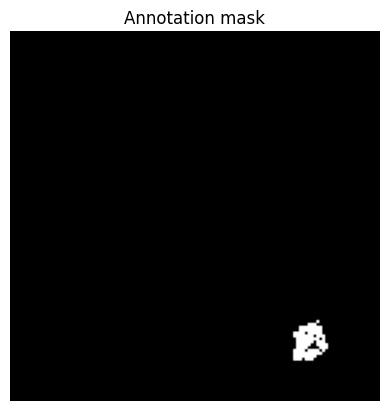

In [28]:
mask_path = geodata_file.replace('.tiff','_mask.tiff')
image = imread(mask_path)
plt.imshow(image, cmap='Greys_r')
plt.title('Annotation mask')
#plt.colorbar()
plt.axis('off')  # To hide axis values
plt.show()

Here is some code how to load the trained model and extract information from it:

In [29]:
import torch

# Load the model
filepath = 'train/alpine_flex_22,33,44,55,44,33,22/best_model.pth'
model = torch.load(filepath)

# Print the model architecture
print(model)


OrderedDict([('Conv1.conv.0.weight', tensor([[[[-4.9843e-02, -1.4045e-01, -1.1732e-02],
          [-6.6944e-02, -6.3006e-02,  7.0899e-02],
          [-1.5399e-01, -5.6477e-02,  1.0878e-02]],

         [[-9.5124e-02, -2.0547e-02,  3.5512e-02],
          [-4.1082e-02,  9.1673e-02,  1.0852e-01],
          [ 4.4845e-02,  2.3163e-02,  1.4727e-01]],

         [[ 1.6427e-02,  8.6756e-02,  1.4675e-01],
          [ 6.2766e-02,  9.8139e-02,  1.2658e-01],
          [-1.4482e-02,  1.4042e-01, -5.0631e-02]],

         ...,

         [[ 1.0223e-01,  8.5193e-03,  4.6143e-02],
          [ 5.8856e-02,  1.3554e-01,  1.1117e-01],
          [-9.5727e-03,  8.2544e-02,  1.8739e-01]],

         [[ 8.8495e-02, -6.8611e-02, -6.2754e-02],
          [-2.8505e-02,  6.7737e-02,  9.8062e-02],
          [-1.0527e-02, -2.4325e-02, -2.9297e-02]],

         [[-2.5293e-02,  4.7899e-04, -1.4795e-01],
          [-8.6639e-02, -1.0528e-01, -1.8699e-01],
          [-6.4648e-02, -2.0934e-01, -1.6672e-01]]],


        [[[-6.82